In [35]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

BASE_DIR = Path().resolve()
TSV_DIR = BASE_DIR / "data" / "tsv"


In [36]:
# Test_summ tsv is looking at MZ range of +/- 0.001 with QVALUE < 0.01
test_summ_filepath = TSV_DIR / "test_summ.tsv"
test = pd.read_csv(test_summ_filepath, sep="\t")


In [38]:
print(test.shape)
test.head(10)


(242932, 13)


,EXP_IM,EXP_RT,FEATURE_ID,IM,INTENSITY,NORM_RT,QVALUE,MZ,IM_FLAT,IM_COUNT,MZ_COUNT,INTENSITY_FLAT,INTENSITY_COUNT
0,0.850342,1595.29,-9223234016384753589,"[1.0207536, 0.96632004]","[25.001118, 25.001118]",21.809228,0.000002,"[414.2098992281847, 561.2780548489603]","[0.96632004, 1.0207536]",2,2,"[25.001118, 25.001118]",2
1,1.125955,2425.21,-9223191966956721060,"[array([1.0241526, 1.0309496, 1.0343475, 1.038...","[array([10.000413, 25.001118, 28.998962, 38.00...",35.760367,0.000005,[703.3362774242454],"[1.0241526, 1.0309496, 1.0343475, 1.0388775, 1...",10,1,"[10.000413, 25.001118, 28.998962, 38.000164, 5...",9
2,0.998811,2562.34,-9223025810847936645,"[array([0.950426 , 1.0683067, 1.0717007]), 1.0...","[array([ 51.99959 , 53.00184 , 115.003174]), ...",37.901709,0.000133,"[589.2860497375973, 698.3616941947048]","[0.950426, 1.0558592, 1.0683067, 1.0717007]",4,2,"[51.99959, 53.00184, 115.003174, 72.99557]",4
3,1.020071,2257.98,-9222887475392189835,[1.0286841],[28.000488],32.742510,0.000002,[1123.5497833398597],[1.0286841],1,1,[28.000488],1
4,1.233716,5206.53,-9222870108405128498,"[1.0366126, 0.95950925]","[54.001713, 25.001118]",82.185008,0.000008,"[373.2073524671408, 543.3130628029355]","[0.95950925, 1.0366126]",2,2,"[54.001713, 25.001118]",2
5,0.906408,2062.76,-9222854012696124655,"[array([0.9799372, 1.0660439]), array([1.00602...","[array([38.000164, 67.00009 ]), array([25.0011...",29.586655,0.000189,"[361.2447031515288, 490.28747191560615]","[0.9799372, 1.0060204, 1.009421, 1.0184875, 1....",7,2,"[38.000164, 67.00009, 25.001118, 26.999048, 45...",7
6,1.083316,5164.67,-9222482137757787177,[1.0116879],[42.001728],81.523917,0.000247,[1133.5731677184103],[1.0116879],1,1,[42.001728],1
7,0.742651,1215.56,-9222392951750703420,[1.0332149],[38.000164],16.633539,0.009613,[562.275608560594],[1.0332149],1,1,[38.000164],1
8,1.164185,5043.80,-9222392043910070687,[1.0717007],[12.999451],79.633768,0.000003,[427.2195842443281],[1.0717007],1,1,[12.999451],1
9,0.807486,3498.49,-9222302006162991364,"[array([1.0343475, 1.0501996])]","[array([54.001713, 64.00204 ])]",53.767779,0.000002,[447.2237775365897],"[1.0343475, 1.0501996]",2,1,"[54.001713, 64.00204]",2


In [39]:
# PLOTTING FUNCTIONS


def piechart_im_per_mz(summary_df):
    # Get ratio of IM per MZ reads PER feature ID
    summary_df["IM/MZ"] = summary_df["IM_COUNT"] / summary_df["MZ_COUNT"]
    labels, counts = zip(*summary_df["IM/MZ"].value_counts().iteritems())
    plt.pie(counts, labels=labels)
    plt.show()


def piechart_mz(summary_df):
    # Get MZ reads PER feature ID
    labels, counts = zip(*summary_df["MZ_COUNT"].value_counts().iteritems())
    plt.pie(counts, labels=labels)
    plt.show()


def piechart_im(summary_df):
    # Get IM reads PER feature ID
    labels, counts = zip(*summary_df["IM_COUNT"].value_counts().iteritems())
    plt.pie(counts, labels=labels)
    plt.show()


def hist_mz(mz_arr, bins=100):
    # Plot frequency of MZ
    plt.hist(mz_arr, bins=bins)
    plt.title(f"Significant Spectra (N={len(mz_arr)})")
    plt.xlabel("MZ")
    plt.xticks(np.arange(200, max(mz_arr) + 1, 100.0))
    plt.ylabel("Count")
    plt.show()


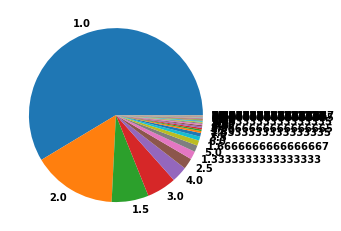

In [40]:
piechart_im_per_mz(test)


In [41]:
# Function to compress nested list dynamically
def compress_list(l):
    concat = []
    for item in l:
        if hasattr(item, "__iter__"):
            concat.extend(item)
        else:
            concat.append(item)
    return concat


compress_list([[1, 2, 3], [1, 3, 10], 1, 2, [1, 2]])


[1, 2, 3, 1, 3, 10, 1, 2, 1, 2]

In [42]:
# Fetch MZ as written in summarized file
mz_arr = [eval(mz) for mz in test["MZ"]]
mz_arr_flat = compress_list(mz_arr)


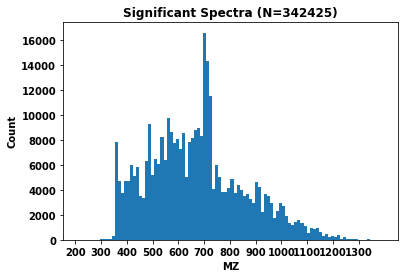

In [43]:
hist_mz(mz_arr_flat)


In [47]:
print(len(mz_arr_flat))
print(len(set(mz_arr_flat)))


342425
7855


In [51]:
TEMP_DIR = TSV_DIR / "temp"


def read_tsv_in_dir_and_merge(tsv_dir):
    # tsv_dir is a Path obj
    tsv_files = tsv_dir.rglob("*.tsv")
    df = pd.DataFrame()
    for tsv in tsv_files:
        df = pd.concat([df, pd.read_csv(tsv, sep="\t")])
        # Delete file
        # tsv.unlink()
    return df


In [52]:
agg_1_168_exp = read_tsv_in_dir_and_merge(TEMP_DIR)


In [54]:
agg_1_168_exp.head(15)


,FEATURE_ID,EXP_IM,EXP_RT,IM,INTENSITY,MZ,NORM_RT,QVALUE,IM_FLAT,IM_COUNT,MZ_COUNT,INTENSITY_FLAT,INTENSITY_COUNT
0,7743121668572422728,0.833948,2376.06,"[0.9935485, 1.0173542, 0.9901462, [0.97766805,...","[48.00197, 25.001118, 23.999681, [71.99853, 72...","[579.3281066078157, 708.3535000374928, 708.357...",34.918728,0.000002,"[0.9742641, 0.97766805, 0.9810717, 0.98901206,...",15,8,"[48.00197, 25.001118, 23.999681, 71.99853, 72....",15
1,7743147153838182964,1.128334,5548.98,"[1.0139545, 0.9561033, 1.0150878, 1.0626494, 0...","[68.00014, 104.00471, 51.00251, 15.000338, 31....","[445.2011117590191, 686.3856858360219, 686.389...",87.761898,0.000003,"[0.9561033, 0.97312933, 1.0139545, 1.0150878, ...",6,6,"[68.00014, 104.00471, 51.00251, 15.000338, 31....",6
2,7743176480279389687,1.054137,5628.93,"[[1.0468035, 1.04001, 1.0343475], [0.9515615, ...","[[48.999626, 64.00204, 55.9984], [48.00197, 10...","[708.3701567709128, 708.374321021339, 708.3784...",89.083454,0.000414,"[0.9515615, 0.967455, 0.98220617, 1.0037532, 1...",11,7,"[48.999626, 64.00204, 55.9984, 48.00197, 10.99...",11
3,7743213319189398251,0.901146,1492.26,"[[0.9765334, 1.0196205, 0.99921817], [0.962914...","[[51.00251, 45.999134, 79.001175], [26.000776,...","[380.1886010997264, 380.1916518338678, 380.194...",20.230521,0.000002,"[0.9606445, 0.9629148, 0.9765334, 0.98220617, ...",43,15,"[51.00251, 45.999134, 79.001175, 26.000776, 26...",43
4,7743260288331154982,0.940149,5740.67,"[0.98674357, [1.0139545, 1.016221], 0.98787785...","[26.000776, [44.002514, 46.999405], 26.000776,...","[547.240583033961, 547.244243110076, 733.32147...",90.889221,0.000114,"[0.94588333, 0.94588333, 0.94815475, 0.9481547...",28,19,"[26.000776, 44.002514, 46.999405, 26.000776, 1...",28
5,7743265752725248316,1.122720,4449.27,"[0.9901462, 0.9856093, 1.0354801, 1.0286841, 1...","[115.99658, 46.999405, 12.999451, 63.002026, 4...","[452.2505877115074, 452.2539150473328, 599.317...",69.667197,0.000002,"[0.9856093, 0.9901462, 1.0082875, 1.0105544, 1...",11,10,"[115.99658, 46.999405, 12.999451, 63.002026, 4...",11
6,7743285980781669807,1.003456,1546.88,"[1.0275513, 1.0309496, 1.0196205, 1.0014857]","[39.99975, 45.999134, 39.000378, 46.999405]","[499.32578386462455, 698.4361205044346, 956.51...",21.033478,0.000002,"[1.0014857, 1.0196205, 1.0275513, 1.0309496]",4,4,"[39.99975, 45.999134, 39.000378, 46.999405]",4
7,7743287175868739270,1.266970,5526.42,"[1.0717007, [0.95950925, 1.0468035], [1.068306...","[87.0047, [10.000413, 117.99361], [26.000776, ...","[350.1294703131408, 350.14118094699995, 576.29...",87.405401,0.000003,"[0.95950925, 1.0026195, 1.04001, 1.0468035, 1....",7,5,"[87.0047, 10.000413, 117.99361, 26.000776, 20....",7
8,7743316562713704570,1.213875,3490.37,"[0.98447496, [0.9856093, 0.9742641], 0.9844749...","[55.9984, [32.999866, 12.00049], 20.001076, [1...","[946.4564375151832, 1173.516812942276, 1173.52...",53.629745,0.000002,"[0.9742641, 0.9799372, 0.98447496, 0.98447496,...",6,4,"[55.9984, 32.999866, 12.00049, 20.001076, 10.0...",6
9,7743337676845337802,1.070533,4816.46,"[1.0728319, 0.9856093, 1.0524637, 0.9753988, 0...","[59.99871, 10.000413, 63.002026, 83.00519, 77....","[603.253666816772, 603.2575096619437, 603.2651...",75.873595,0.001633,"[0.96858996, 0.96972483, 0.9719946, 0.9753988,...",24,13,"[59.99871, 10.000413, 63.002026, 83.00519, 77....",24
